# Step 1: Installation and Setup

In [0]:
!pip install -q tensorflow-gpu

In [0]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.1.0


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Data Preprocessing

In [0]:
# importing the dataset
from tensorflow.keras.datasets import mnist

In [6]:
# loading the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [8]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [9]:
x_train.min(), x_train.max()

(0, 255)

In [10]:
y_train.min(), y_train.max()

(0, 9)

In [0]:
# normalize the dataset
x_train = x_train / 255.0
x_test = x_test / 255.0

In [12]:
x_train.min(), x_train.max()

(0.0, 1.0)

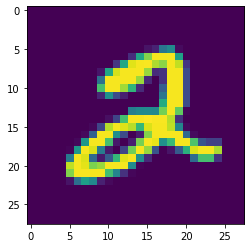

In [13]:
plt.imshow(x_train[5])

In [14]:
y_train[5]

2

# Step 3: Building the LSTM

In [0]:
# define an object (initilizing RNN)
model = tf.keras.models.Sequential()

In [0]:
# first LSTM layer
model.add(tf.keras.layers.LSTM(units=128, activation='relu', return_sequences=True, input_shape=(28, 28)))
model.add(tf.keras.layers.Dropout(0.2))

# second LSTM layer
model.add(tf.keras.layers.LSTM(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

# fully connected layer (first dense layer)
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

# output layer
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 28, 128)           80384     
_________________________________________________________________
dropout (Dropout)            (None, 28, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

In [0]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

In [0]:
# compile the model
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 4: Training the model

In [0]:
epochs=20

In [21]:
history =  model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 76s 1ms/sample - loss: 0.5704 - accuracy: 0.8148 - val_loss: 0.1256 - val_accuracy: 0.9610
Epoch 2/20
60000/60000 [==============================] - 73s 1ms/sample - loss: 0.1530 - accuracy: 0.9594 - val_loss: 0.0995 - val_accuracy: 0.9753
Epoch 3/20
60000/60000 [==============================] - 72s 1ms/sample - loss: 0.1062 - accuracy: 0.9720 - val_loss: 0.0689 - val_accuracy: 0.9800
Epoch 4/20
60000/60000 [==============================] - 71s 1ms/sample - loss: 0.0837 - accuracy: 0.9781 - val_loss: 0.0584 - val_accuracy: 0.9838
Epoch 5/20
60000/60000 [==============================] - 70s 1ms/sample - loss: 0.0699 - accuracy: 0.9820 - val_loss: 0.0632 - val_accuracy: 0.9834
Epoch 6/20
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.0727 - accuracy: 0.9816 - val_loss: 0.0528 - val_accuracy: 0.9850
Epoch 7/20
60000/60000 [==============================] 

In [0]:
# predictions
y_pred = model.predict_classes(x_test)

In [23]:
print(y_pred[10]), print(y_test[10])

0
0


(None, None)

In [24]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 978    0    0    0    0    0    1    1    0    0]
 [   0 1129    0    0    2    1    2    1    0    0]
 [   2    0 1023    2    0    0    3    0    2    0]
 [   4    0    1 1000    0    2    0    1    1    1]
 [   0    0    0    0  972    0    5    0    0    5]
 [   0    0    0    3    0  887    1    0    0    1]
 [   4    2    0    0    0    7  943    0    2    0]
 [   1    3    8    0    3    0    0 1012    0    1]
 [   1    0    1    2    0    2    1    0  967    0]
 [   0    0    0    1    9    2    0    5    0  992]]


In [25]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.9903


# Step 5: Learning Curve

In [0]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

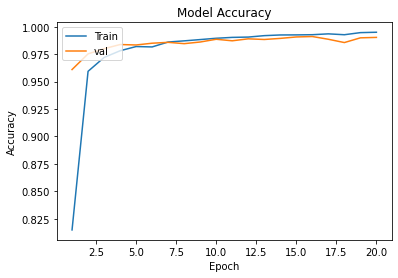

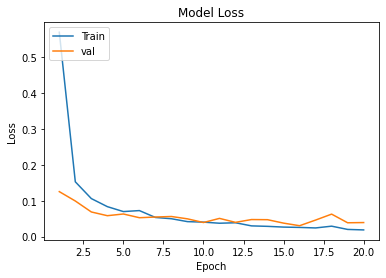

In [27]:
learning_curve(history, epochs)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


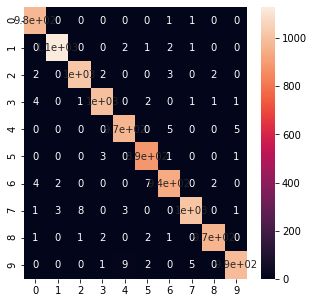

In [28]:
import seaborn as sns
# heat map of data
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True)